In [10]:
#Neural Networks by Hammad A Khan
%pylab inline

# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)


Populating the interactive namespace from numpy and matplotlib


In [11]:
X

array([[  3.,   5.],
       [  5.,   1.],
       [ 10.,   2.]])

In [12]:
y

array([[ 75.],
       [ 82.],
       [ 93.]])

In [13]:
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

In [14]:
print X.shape, y.shape

(3, 2) (3, 1)


In [15]:
class NeuralNetworkV1 (object):
    def __init__(self):
        #define hyperParameters - parameters that we define ourselves and not the NN
        self.inputLayerSize=2
        self.outputLayerSize=1
        self.hiddenLayerSize=3 #even hidden layer size i.e. sturcture inside the NN is defined as hyperParameters
        
        #estimate randomly, Weights of all levels i.e. in a Single layer NN 2 weights are needed
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        print(self.W1)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        print(self.W2)
    
    def forward(self, x):
        #propagate through NN
        self.z2 = np.dot(x, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        self.yAnswer = self.sigmoid(self.z3)
        return self.yAnswer

    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2

In [16]:
NN = NeuralNetworkV1()

[[-1.41521222  0.25206514  2.11966075]
 [-0.83850677  0.17403702  0.32217436]]
[[-0.63257141]
 [-0.31981639]
 [ 0.37752923]]


In [17]:
X

array([[ 0.3,  1. ],
       [ 0.5,  0.2],
       [ 1. ,  0.4]])

In [18]:
yHat = NN.forward(X)

In [19]:
yHat

array([[ 0.48841206],
       [ 0.48154319],
       [ 0.51561354]])

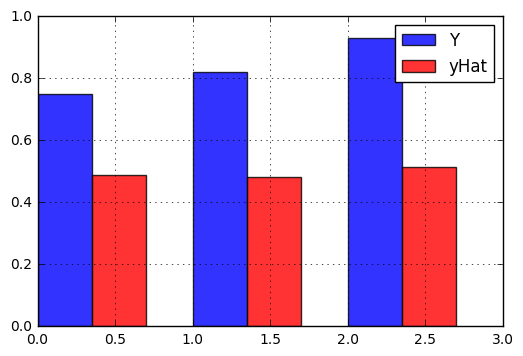

In [20]:
#Compare estimate, yHat, to actually score
bar([0,1,2], y, width = 0.35, alpha=0.8)
bar([0.35,1.35,2.35],yHat, width = 0.35, color='r', alpha=0.8)
grid(1)
legend(['Y', 'yHat'])

In [21]:
NN = NeuralNetworkV1()

[[ 1.77420482 -2.32740183  1.00590765]
 [-0.19743213  0.10092876 -0.861909  ]]
[[ 0.22462752]
 [-0.54439924]
 [ 1.97741063]]


In [22]:
cost1 = NN.costFunction(X,y)

In [23]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

In [24]:
dJdW1

array([[-0.001124  ,  0.00212194, -0.01353798],
       [-0.00143873,  0.0031064 , -0.01370173]])

In [25]:
dJdW2

array([[-0.03481495],
       [-0.01145457],
       [-0.02564804]])

In [26]:
scalar = 3
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(X,y)

In [27]:
print cost1, cost2

0.0130566045134 0.0215722560038


In [28]:

dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost3 = NN.costFunction(X, y)

In [29]:
print cost2, cost3

0.0215722560038 0.0104967447195


In [30]:
NN.W2

array([[ 0.26637808],
       [-0.53008024],
       [ 2.0063624 ]])